In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -d -v -p matplotlib

Sebastian Raschka 15/04/2015 

CPython 3.4.3
IPython 3.1.0

matplotlib 1.4.3


In [2]:
import sys
sys.path = ['/Users/sebastian/github/mlxtend'] + sys.path

import mlxtend
mlxtend.__version__

'0.2.4'

# Plotting Decision Regions

## Sections

- [2D Decision Region](#2D-Decision-Region)
- [Highlighting Test Data](#Highlighting-Test-Data)
- [1D Decision Boundary](#1D-Decision-Boundary)
- [Making Subplots](#Making-Subplots)

<br>
<br>

## 2D Decision Region

[[back to top](#Sections)]

In [3]:
%matplotlib inline

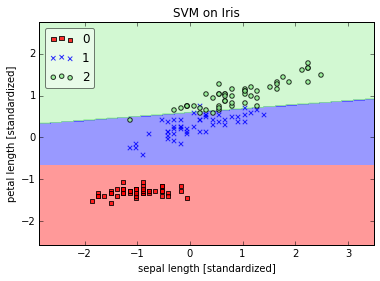

In [4]:
from mlxtend.evaluate import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0,2]]
sc = StandardScaler()
X = sc.fit_transform(X)

y = iris.target

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)

##########################################################
# Plotting decision regions

plot_decision_regions(X, y, clf=svm, res=0.02, legend=2)
##########################################################

# Adding axes annotations
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.title('SVM on Iris')
plt.show()

<br>
<br>

## Highlighting Test Data

[[back to top](#Sections)]

Via the `X_highlight`, a second dataset can be provided to highlight particular points in the dataset via a circle.

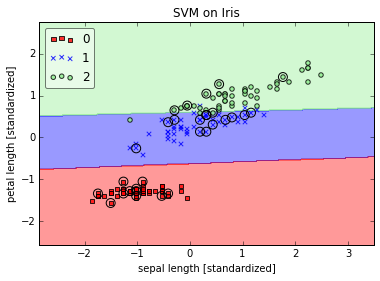

In [5]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) 

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X_train, y_train)

##########################################################
# Plotting decision regions

plot_decision_regions(X, y, clf=svm, 
                      X_highlight=X_test, 
                      res=0.02, legend=2)
##########################################################

# Adding axes annotations
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.title('SVM on Iris')
plt.show()

<br>
<br>

## 1D Decision Boundary

[[back to top](#Sections)]

If you are plotting 1D data, please make sure that the NumPy array has 2 dimensions.

E.g., 

In [7]:
import numpy as np

# Not okay!
X = np.array([1, 2, 3])
X

array([1, 2, 3])

In [8]:
# Okay!
X = X[:, None]
X

array([[1],
       [2],
       [3]])

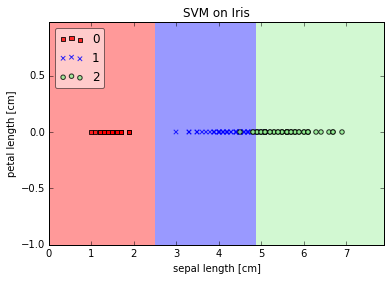

In [10]:
from mlxtend.evaluate import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, 2]
X = X[:, None]
y = iris.target

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X,y)

# Plotting decision regions
plot_decision_regions(X, y, clf=svm, res=0.02, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

<br>
<br>

## Making Subplots

[[back to top](#Sections)]

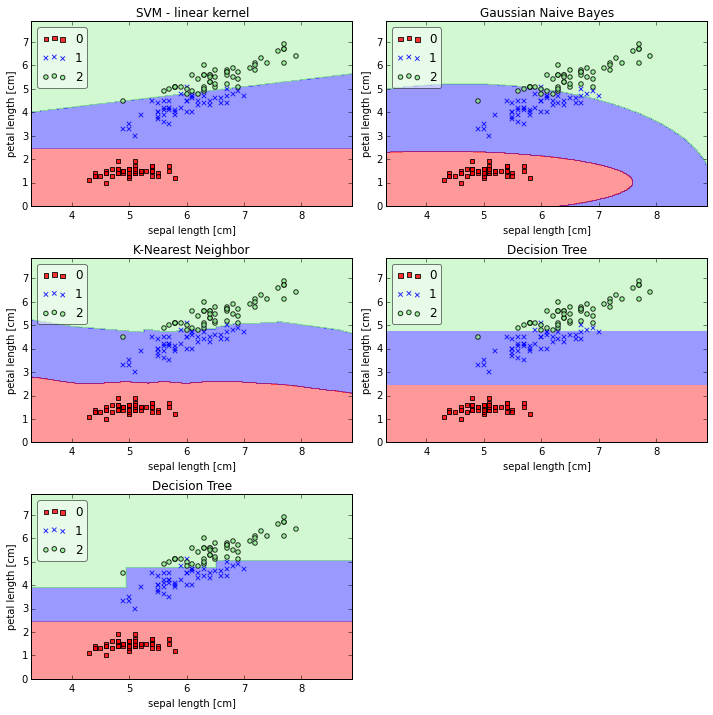

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0,2]]
y = iris.target


# Fit classifiers
gnb = GaussianNB().fit(X, y)

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform').fit(X, y)

lin_svm = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False).fit(X, y)

tree = DecisionTreeClassifier(criterion='entropy',
            max_depth=2, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            random_state=None, splitter='best').fit(X, y)

tree2 = DecisionTreeClassifier(criterion='gini',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            random_state=None, splitter='best').fit(X, y)


### Plotting

fig = plt.figure(figsize=(10,10))

titles = ['SVM - linear kernel',
          'Gaussian Naive Bayes',
          'K-Nearest Neighbor',
          'Decision Tree',
          'Decision Tree']


for i, clf in enumerate((lin_svm, gnb, knn, tree, tree2)):
    
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    # Plotting decision regions
    plot_decision_regions(X, y, clf=clf, res=0.02, legend=2)
    
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.title(titles[i])

plt.tight_layout()
plt.show()